In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: SNY
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


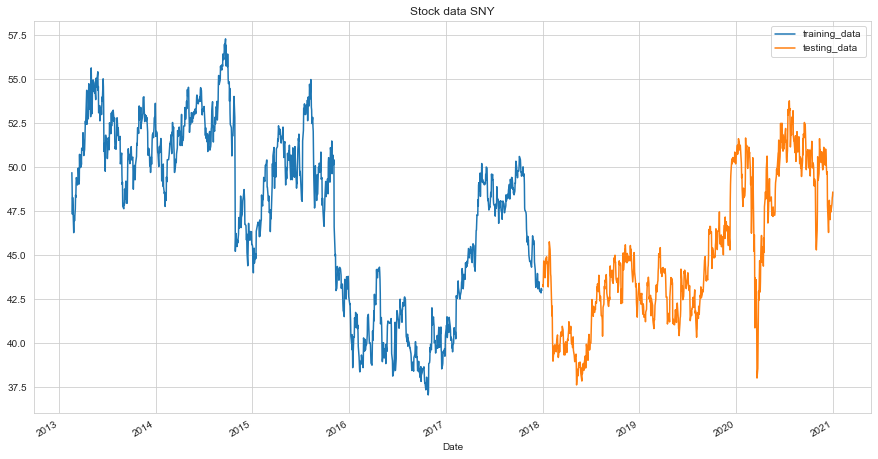

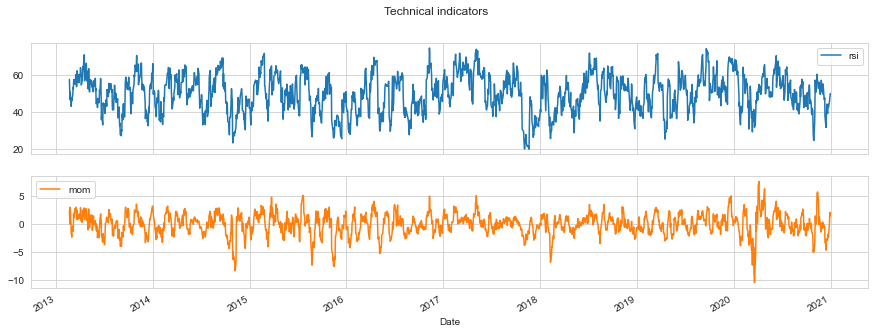

In [2]:
stock_name = 'sny'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1109.97, duration: 0:00:00.427097
episode: 2/2000, episode end value: 1071.98, duration: 0:00:00.491114
episode: 3/2000, episode end value: 1049.55, duration: 0:00:00.510116
episode: 4/2000, episode end value: 1047.36, duration: 0:00:00.389085
episode: 5/2000, episode end value: 1096.22, duration: 0:00:00.417095
episode: 6/2000, episode end value: 1089.63, duration: 0:00:00.468106
episode: 7/2000, episode end value: 1122.52, duration: 0:00:00.382085
episode: 8/2000, episode end value: 1099.57, duration: 0:00:00.378083
episode: 9/2000, episode end value: 1134.28, duration: 0:00:00.380086
episode: 10/2000, episode end value: 1097.33, duration: 0:00:00.387088
episode: 11/2000, episode end value: 1103.32, duration: 0:00:00.486107
episode: 12/2000, episode end value: 1090.81, duration: 0:00:00.439621
episode: 13/2000, episode end value: 1095.08, duration: 0:00:00.453457
episode: 14/2000, episode end value: 1097.02, duration: 0:00:00.411828
episode: 15/200

episode: 117/2000, episode end value: 1126.07, duration: 0:00:00.464106
episode: 118/2000, episode end value: 1086.46, duration: 0:00:00.489112
episode: 119/2000, episode end value: 1093.09, duration: 0:00:00.509115
episode: 120/2000, episode end value: 1123.82, duration: 0:00:00.467105
episode: 121/2000, episode end value: 1093.96, duration: 0:00:00.536121
episode: 122/2000, episode end value: 1121.83, duration: 0:00:00.489113
episode: 123/2000, episode end value: 1095.35, duration: 0:00:00.509123
episode: 124/2000, episode end value: 1109.79, duration: 0:00:00.493109
episode: 125/2000, episode end value: 1143.36, duration: 0:00:00.470107
episode: 126/2000, episode end value: 1084.71, duration: 0:00:00.430101
episode: 127/2000, episode end value: 1097.22, duration: 0:00:00.511116
episode: 128/2000, episode end value: 1115.85, duration: 0:00:00.491114
episode: 129/2000, episode end value: 1130.10, duration: 0:00:00.475108
episode: 130/2000, episode end value: 1114.74, duration: 0:00:00

episode: 231/2000, episode end value: 1102.53, duration: 0:00:00.428094
episode: 232/2000, episode end value: 1093.62, duration: 0:00:00.454108
episode: 233/2000, episode end value: 1100.65, duration: 0:00:00.461101
episode: 234/2000, episode end value: 1102.13, duration: 0:00:00.475106
episode: 235/2000, episode end value: 1085.11, duration: 0:00:00.495112
episode: 236/2000, episode end value: 1084.98, duration: 0:00:00.419096
episode: 237/2000, episode end value: 1096.73, duration: 0:00:00.447099
episode: 238/2000, episode end value: 1079.02, duration: 0:00:00.488108
episode: 239/2000, episode end value: 1092.72, duration: 0:00:00.432095
episode: 240/2000, episode end value: 1075.44, duration: 0:00:00.459105
episode: 241/2000, episode end value: 1079.40, duration: 0:00:00.379086
episode: 242/2000, episode end value: 1082.63, duration: 0:00:00.466107
episode: 243/2000, episode end value: 1095.54, duration: 0:00:00.507113
episode: 244/2000, episode end value: 1102.64, duration: 0:00:00

episode: 345/2000, episode end value: 1098.02, duration: 0:00:00.428099
episode: 346/2000, episode end value: 1100.35, duration: 0:00:00.441101
episode: 347/2000, episode end value: 1094.54, duration: 0:00:00.429097
episode: 348/2000, episode end value: 1094.56, duration: 0:00:00.532122
episode: 349/2000, episode end value: 1092.50, duration: 0:00:00.476103
episode: 350/2000, episode end value: 1095.78, duration: 0:00:00.511113
episode: 351/2000, episode end value: 1101.85, duration: 0:00:00.464105
episode: 352/2000, episode end value: 1134.39, duration: 0:00:00.438094
episode: 353/2000, episode end value: 1105.13, duration: 0:00:00.412091
episode: 354/2000, episode end value: 1099.50, duration: 0:00:00.461104
episode: 355/2000, episode end value: 1107.33, duration: 0:00:00.508117
episode: 356/2000, episode end value: 1089.07, duration: 0:00:00.463109
episode: 357/2000, episode end value: 1099.85, duration: 0:00:00.465617
episode: 358/2000, episode end value: 1113.28, duration: 0:00:00

episode: 459/2000, episode end value: 1102.13, duration: 0:00:00.391087
episode: 460/2000, episode end value: 1114.05, duration: 0:00:00.429097
episode: 461/2000, episode end value: 1104.50, duration: 0:00:00.399093
episode: 462/2000, episode end value: 1088.59, duration: 0:00:00.430098
episode: 463/2000, episode end value: 1131.66, duration: 0:00:00.426091
episode: 464/2000, episode end value: 1102.79, duration: 0:00:00.384091
episode: 465/2000, episode end value: 1130.29, duration: 0:00:00.418095
episode: 466/2000, episode end value: 1123.09, duration: 0:00:00.437100
episode: 467/2000, episode end value: 1089.53, duration: 0:00:00.422094
episode: 468/2000, episode end value: 1095.25, duration: 0:00:00.410094
episode: 469/2000, episode end value: 1085.41, duration: 0:00:00.422091
episode: 470/2000, episode end value: 1118.25, duration: 0:00:00.481111
episode: 471/2000, episode end value: 1094.14, duration: 0:00:00.509115
episode: 472/2000, episode end value: 1112.31, duration: 0:00:00

episode: 573/2000, episode end value: 1094.84, duration: 0:00:00.455098
episode: 574/2000, episode end value: 1085.20, duration: 0:00:00.433097
episode: 575/2000, episode end value: 1095.51, duration: 0:00:00.452101
episode: 576/2000, episode end value: 1107.48, duration: 0:00:00.470106
episode: 577/2000, episode end value: 1119.51, duration: 0:00:00.436101
episode: 578/2000, episode end value: 1115.25, duration: 0:00:00.454102
episode: 579/2000, episode end value: 1079.93, duration: 0:00:00.464101
episode: 580/2000, episode end value: 1120.92, duration: 0:00:00.399097
episode: 581/2000, episode end value: 1082.13, duration: 0:00:00.452099
episode: 582/2000, episode end value: 1079.33, duration: 0:00:00.485116
episode: 583/2000, episode end value: 1083.49, duration: 0:00:00.478104
episode: 584/2000, episode end value: 1119.37, duration: 0:00:00.434018
episode: 585/2000, episode end value: 1087.28, duration: 0:00:00.418592
episode: 586/2000, episode end value: 1091.90, duration: 0:00:00

episode: 687/2000, episode end value: 1097.00, duration: 0:00:00.438116
episode: 688/2000, episode end value: 1111.62, duration: 0:00:00.538125
episode: 689/2000, episode end value: 1110.72, duration: 0:00:00.501113
episode: 690/2000, episode end value: 1096.98, duration: 0:00:00.517117
episode: 691/2000, episode end value: 1116.56, duration: 0:00:00.558122
episode: 692/2000, episode end value: 1111.22, duration: 0:00:00.461105
episode: 693/2000, episode end value: 1099.30, duration: 0:00:00.453169
episode: 694/2000, episode end value: 1111.77, duration: 0:00:00.495086
episode: 695/2000, episode end value: 1115.76, duration: 0:00:00.552126
episode: 696/2000, episode end value: 1116.54, duration: 0:00:00.562126
episode: 697/2000, episode end value: 1106.93, duration: 0:00:00.562125
episode: 698/2000, episode end value: 1100.24, duration: 0:00:00.537115
episode: 699/2000, episode end value: 1103.42, duration: 0:00:00.482107
episode: 700/2000, episode end value: 1101.08, duration: 0:00:00

episode: 801/2000, episode end value: 1093.89, duration: 0:00:00.449104
episode: 802/2000, episode end value: 1104.79, duration: 0:00:00.474110
episode: 803/2000, episode end value: 1104.37, duration: 0:00:00.462108
episode: 804/2000, episode end value: 1091.60, duration: 0:00:00.418091
episode: 805/2000, episode end value: 1093.32, duration: 0:00:00.430098
episode: 806/2000, episode end value: 1120.13, duration: 0:00:00.536120
episode: 807/2000, episode end value: 1093.15, duration: 0:00:00.453103
episode: 808/2000, episode end value: 1104.02, duration: 0:00:00.388081
episode: 809/2000, episode end value: 1082.21, duration: 0:00:00.433098
episode: 810/2000, episode end value: 1107.42, duration: 0:00:00.464106
episode: 811/2000, episode end value: 1088.43, duration: 0:00:00.501114
episode: 812/2000, episode end value: 1105.62, duration: 0:00:00.500114
episode: 813/2000, episode end value: 1095.30, duration: 0:00:00.507112
episode: 814/2000, episode end value: 1087.08, duration: 0:00:00

episode: 915/2000, episode end value: 1069.08, duration: 0:00:00.430098
episode: 916/2000, episode end value: 1098.00, duration: 0:00:00.420100
episode: 917/2000, episode end value: 1095.27, duration: 0:00:00.492116
episode: 918/2000, episode end value: 1116.36, duration: 0:00:00.515116
episode: 919/2000, episode end value: 1117.17, duration: 0:00:00.515111
episode: 920/2000, episode end value: 1116.58, duration: 0:00:00.538124
episode: 921/2000, episode end value: 1117.06, duration: 0:00:00.573124
episode: 922/2000, episode end value: 1116.83, duration: 0:00:00.545122
episode: 923/2000, episode end value: 1118.01, duration: 0:00:00.558127
episode: 924/2000, episode end value: 1109.51, duration: 0:00:00.483107
episode: 925/2000, episode end value: 1091.53, duration: 0:00:00.443099
episode: 926/2000, episode end value: 1087.14, duration: 0:00:00.445102
episode: 927/2000, episode end value: 1104.12, duration: 0:00:00.518118
episode: 928/2000, episode end value: 1057.55, duration: 0:00:00

episode: 1029/2000, episode end value: 1097.03, duration: 0:00:00.492112
episode: 1030/2000, episode end value: 1089.89, duration: 0:00:00.466103
episode: 1031/2000, episode end value: 1090.28, duration: 0:00:00.472109
episode: 1032/2000, episode end value: 1068.89, duration: 0:00:00.367081
episode: 1033/2000, episode end value: 1091.95, duration: 0:00:00.440101
episode: 1034/2000, episode end value: 1103.27, duration: 0:00:00.475112
episode: 1035/2000, episode end value: 1081.47, duration: 0:00:00.378083
episode: 1036/2000, episode end value: 1083.02, duration: 0:00:00.396095
episode: 1037/2000, episode end value: 1095.29, duration: 0:00:00.454104
episode: 1038/2000, episode end value: 1084.18, duration: 0:00:00.429094
episode: 1039/2000, episode end value: 1089.04, duration: 0:00:00.410090
episode: 1040/2000, episode end value: 1092.66, duration: 0:00:00.429094
episode: 1041/2000, episode end value: 1073.15, duration: 0:00:00.488119
episode: 1042/2000, episode end value: 1085.09, dur

episode: 1142/2000, episode end value: 1090.83, duration: 0:00:00.443103
episode: 1143/2000, episode end value: 1102.83, duration: 0:00:00.492111
episode: 1144/2000, episode end value: 1090.60, duration: 0:00:00.447105
episode: 1145/2000, episode end value: 1081.21, duration: 0:00:00.406088
episode: 1146/2000, episode end value: 1079.88, duration: 0:00:00.473105
episode: 1147/2000, episode end value: 1088.77, duration: 0:00:00.444099
episode: 1148/2000, episode end value: 1085.15, duration: 0:00:00.436098
episode: 1149/2000, episode end value: 1086.49, duration: 0:00:00.448103
episode: 1150/2000, episode end value: 1087.73, duration: 0:00:00.459103
episode: 1151/2000, episode end value: 1082.75, duration: 0:00:00.457103
episode: 1152/2000, episode end value: 1095.67, duration: 0:00:00.409093
episode: 1153/2000, episode end value: 1062.66, duration: 0:00:00.410087
episode: 1154/2000, episode end value: 1104.19, duration: 0:00:00.392093
episode: 1155/2000, episode end value: 1081.82, dur

episode: 1255/2000, episode end value: 1096.74, duration: 0:00:00.436099
episode: 1256/2000, episode end value: 1096.06, duration: 0:00:00.486111
episode: 1257/2000, episode end value: 1107.27, duration: 0:00:00.431102
episode: 1258/2000, episode end value: 1078.66, duration: 0:00:00.429091
episode: 1259/2000, episode end value: 1089.23, duration: 0:00:00.437100
episode: 1260/2000, episode end value: 1089.81, duration: 0:00:00.412089
episode: 1261/2000, episode end value: 1089.41, duration: 0:00:00.440098
episode: 1262/2000, episode end value: 1082.55, duration: 0:00:00.446101
episode: 1263/2000, episode end value: 1089.38, duration: 0:00:00.451104
episode: 1264/2000, episode end value: 1104.20, duration: 0:00:00.448100
episode: 1265/2000, episode end value: 1087.98, duration: 0:00:00.479108
episode: 1266/2000, episode end value: 1086.63, duration: 0:00:00.439101
episode: 1267/2000, episode end value: 1085.64, duration: 0:00:00.394093
episode: 1268/2000, episode end value: 1088.32, dur

episode: 1368/2000, episode end value: 1092.49, duration: 0:00:00.363087
episode: 1369/2000, episode end value: 1089.76, duration: 0:00:00.399089
episode: 1370/2000, episode end value: 1103.42, duration: 0:00:00.466105
episode: 1371/2000, episode end value: 1083.15, duration: 0:00:00.378085
episode: 1372/2000, episode end value: 1098.06, duration: 0:00:00.458104
episode: 1373/2000, episode end value: 1078.69, duration: 0:00:00.416090
episode: 1374/2000, episode end value: 1051.01, duration: 0:00:00.360081
episode: 1375/2000, episode end value: 1042.17, duration: 0:00:00.326079
episode: 1376/2000, episode end value: 1103.04, duration: 0:00:00.343077
episode: 1377/2000, episode end value: 1093.32, duration: 0:00:00.403090
episode: 1378/2000, episode end value: 1081.63, duration: 0:00:00.375090
episode: 1379/2000, episode end value: 1082.80, duration: 0:00:00.403092
episode: 1380/2000, episode end value: 1050.69, duration: 0:00:00.407090
episode: 1381/2000, episode end value: 1084.64, dur

episode: 1481/2000, episode end value: 1085.35, duration: 0:00:00.452101
episode: 1482/2000, episode end value: 1058.97, duration: 0:00:00.441097
episode: 1483/2000, episode end value: 1055.96, duration: 0:00:00.408093
episode: 1484/2000, episode end value: 1085.11, duration: 0:00:00.398088
episode: 1485/2000, episode end value: 1099.02, duration: 0:00:00.469106
episode: 1486/2000, episode end value: 1090.25, duration: 0:00:00.444103
episode: 1487/2000, episode end value: 1068.12, duration: 0:00:00.345076
episode: 1488/2000, episode end value: 1096.12, duration: 0:00:00.358081
episode: 1489/2000, episode end value: 1090.55, duration: 0:00:00.397088
episode: 1490/2000, episode end value: 1082.16, duration: 0:00:00.434097
episode: 1491/2000, episode end value: 1097.30, duration: 0:00:00.489117
episode: 1492/2000, episode end value: 1130.80, duration: 0:00:00.533119
episode: 1493/2000, episode end value: 1126.21, duration: 0:00:00.556122
episode: 1494/2000, episode end value: 1126.89, dur

episode: 1594/2000, episode end value: 1087.88, duration: 0:00:00.388088
episode: 1595/2000, episode end value: 1109.48, duration: 0:00:00.369084
episode: 1596/2000, episode end value: 1056.10, duration: 0:00:00.294065
episode: 1597/2000, episode end value: 1105.73, duration: 0:00:00.349077
episode: 1598/2000, episode end value: 1101.79, duration: 0:00:00.318075
episode: 1599/2000, episode end value: 1089.32, duration: 0:00:00.318071
episode: 1600/2000, episode end value: 1100.68, duration: 0:00:00.324073
episode: 1601/2000, episode end value: 1089.94, duration: 0:00:00.330078
episode: 1602/2000, episode end value: 1103.78, duration: 0:00:00.350078
episode: 1603/2000, episode end value: 1100.11, duration: 0:00:00.341074
episode: 1604/2000, episode end value: 1103.23, duration: 0:00:00.348078
episode: 1605/2000, episode end value: 1086.49, duration: 0:00:00.309069
episode: 1606/2000, episode end value: 1092.43, duration: 0:00:00.326080
episode: 1607/2000, episode end value: 1103.88, dur

episode: 1707/2000, episode end value: 1078.58, duration: 0:00:00.290066
episode: 1708/2000, episode end value: 1091.95, duration: 0:00:00.343070
episode: 1709/2000, episode end value: 1109.31, duration: 0:00:00.326072
episode: 1710/2000, episode end value: 1093.19, duration: 0:00:00.308072
episode: 1711/2000, episode end value: 1057.50, duration: 0:00:00.283064
episode: 1712/2000, episode end value: 1079.44, duration: 0:00:00.284285
episode: 1713/2000, episode end value: 1084.94, duration: 0:00:00.292690
episode: 1714/2000, episode end value: 1096.60, duration: 0:00:00.290633
episode: 1715/2000, episode end value: 1079.91, duration: 0:00:00.286064
episode: 1716/2000, episode end value: 1090.65, duration: 0:00:00.287066
episode: 1717/2000, episode end value: 1104.13, duration: 0:00:00.288067
episode: 1718/2000, episode end value: 1075.83, duration: 0:00:00.293063
episode: 1719/2000, episode end value: 1091.87, duration: 0:00:00.306076
episode: 1720/2000, episode end value: 1092.67, dur

episode: 1820/2000, episode end value: 1080.34, duration: 0:00:00.240062
episode: 1821/2000, episode end value: 1095.38, duration: 0:00:00.263071
episode: 1822/2000, episode end value: 1089.89, duration: 0:00:00.243039
episode: 1823/2000, episode end value: 1098.64, duration: 0:00:00.269077
episode: 1824/2000, episode end value: 1049.32, duration: 0:00:00.222035
episode: 1825/2000, episode end value: 1101.08, duration: 0:00:00.244059
episode: 1826/2000, episode end value: 1081.54, duration: 0:00:00.234051
episode: 1827/2000, episode end value: 1095.56, duration: 0:00:00.249057
episode: 1828/2000, episode end value: 1086.83, duration: 0:00:00.267056
episode: 1829/2000, episode end value: 1080.47, duration: 0:00:00.232067
episode: 1830/2000, episode end value: 1086.33, duration: 0:00:00.235038
episode: 1831/2000, episode end value: 1080.99, duration: 0:00:00.243058
episode: 1832/2000, episode end value: 1093.98, duration: 0:00:00.229051
episode: 1833/2000, episode end value: 1088.37, dur

episode: 1933/2000, episode end value: 1086.64, duration: 0:00:00.257069
episode: 1934/2000, episode end value: 1089.83, duration: 0:00:00.247059
episode: 1935/2000, episode end value: 1110.33, duration: 0:00:00.239044
episode: 1936/2000, episode end value: 1080.46, duration: 0:00:00.243058
episode: 1937/2000, episode end value: 1114.52, duration: 0:00:00.280062
episode: 1938/2000, episode end value: 1104.54, duration: 0:00:00.239062
episode: 1939/2000, episode end value: 1085.82, duration: 0:00:00.246051
episode: 1940/2000, episode end value: 1108.45, duration: 0:00:00.271079
episode: 1941/2000, episode end value: 1119.94, duration: 0:00:00.255041
episode: 1942/2000, episode end value: 1088.35, duration: 0:00:00.248050
episode: 1943/2000, episode end value: 1088.99, duration: 0:00:00.224048
episode: 1944/2000, episode end value: 1068.99, duration: 0:00:00.228049
episode: 1945/2000, episode end value: 1085.60, duration: 0:00:00.212045
episode: 1946/2000, episode end value: 1075.64, dur

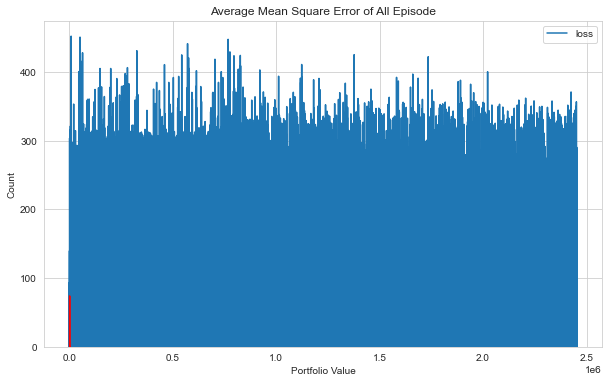

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

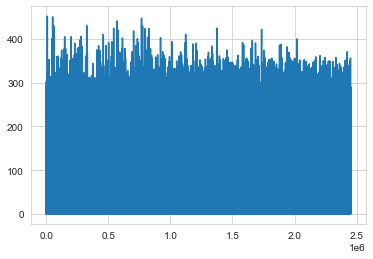

In [5]:
plt.plot(agent.model.losses)

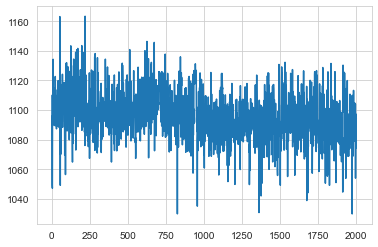

In [6]:
plt.plot(portfolio_value)

episode end value: 1084.11, duration: 0:00:00.062045
Sell: 63 times, Buy: 72 times


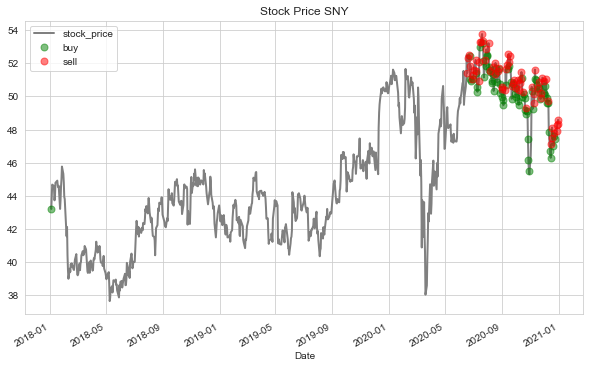

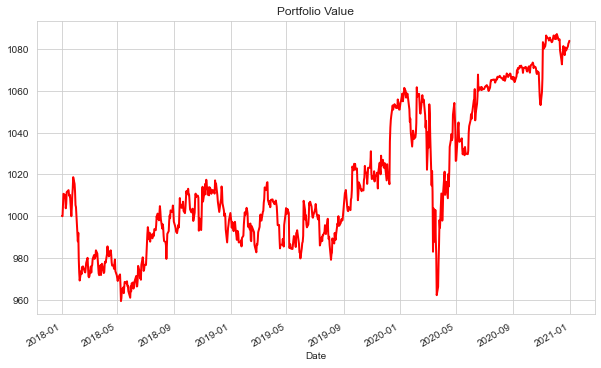

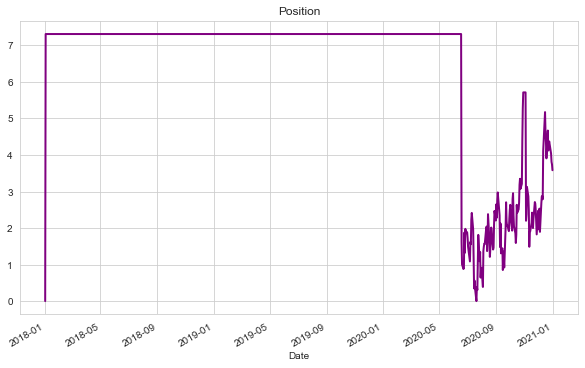

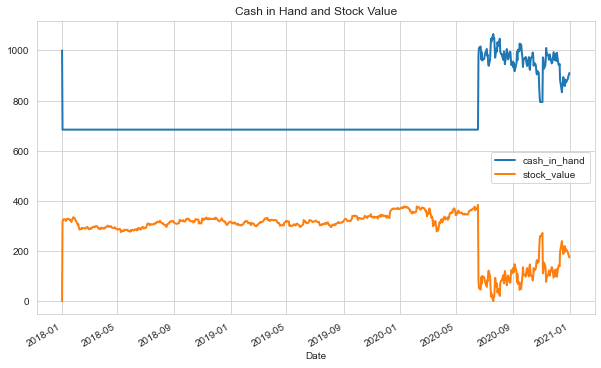

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: SNY
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.73 %
Volatility: 0.0739
shape ratio: 0.2204
Maximun drawdown: -9.39 %
Calmar ratio: 0.2905
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 3.90 %
Volatility (benchmark): 0.2474
shape ratio: 0.1132
Maximun drawdown: -26.40 %
Calmar ratio (benchmark): 0.1477


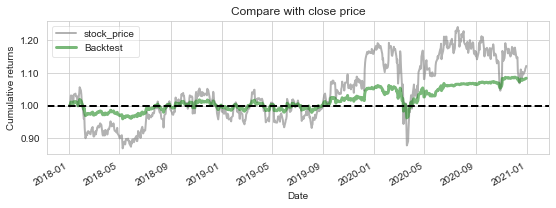

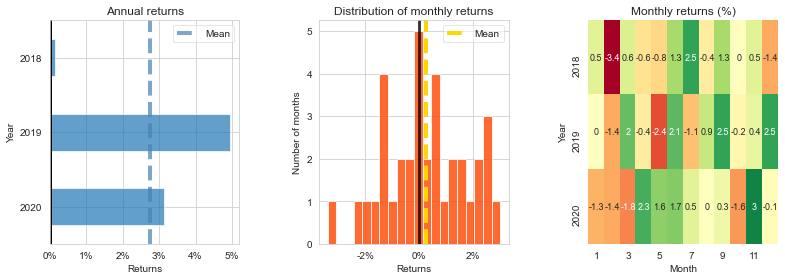

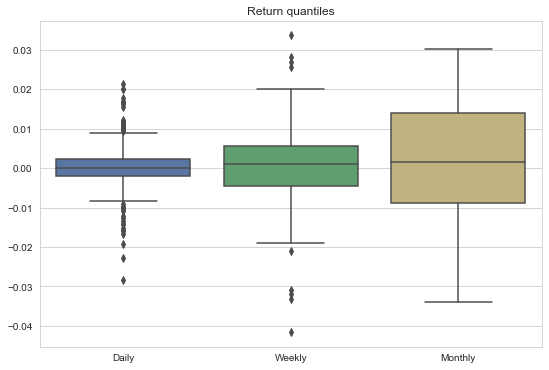

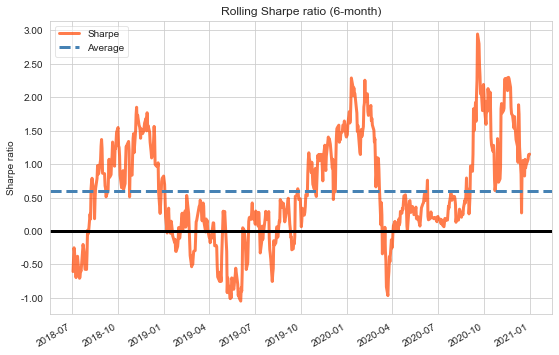

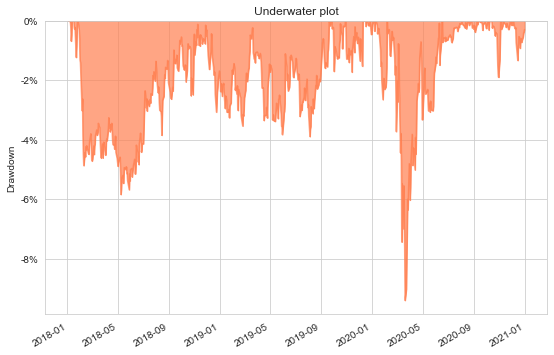

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')